## **Factor Analysis on the S&P Dow Jones Indices with XGBoost**

According to the [S&P Dow Jones Indices](https://www.spglobal.com/spdji/en/landing/investment-themes/factors/) website, "Factors such as size, value, and growth have played a part in asset allocation decisions for decades. With the advent of factor indexing, passive investors gained access to a broader range of exposures. Today, investors can access factors both individually and in combination through a range of ETFs, tapping into a world of sophisticated strategies that were once available only via active management."

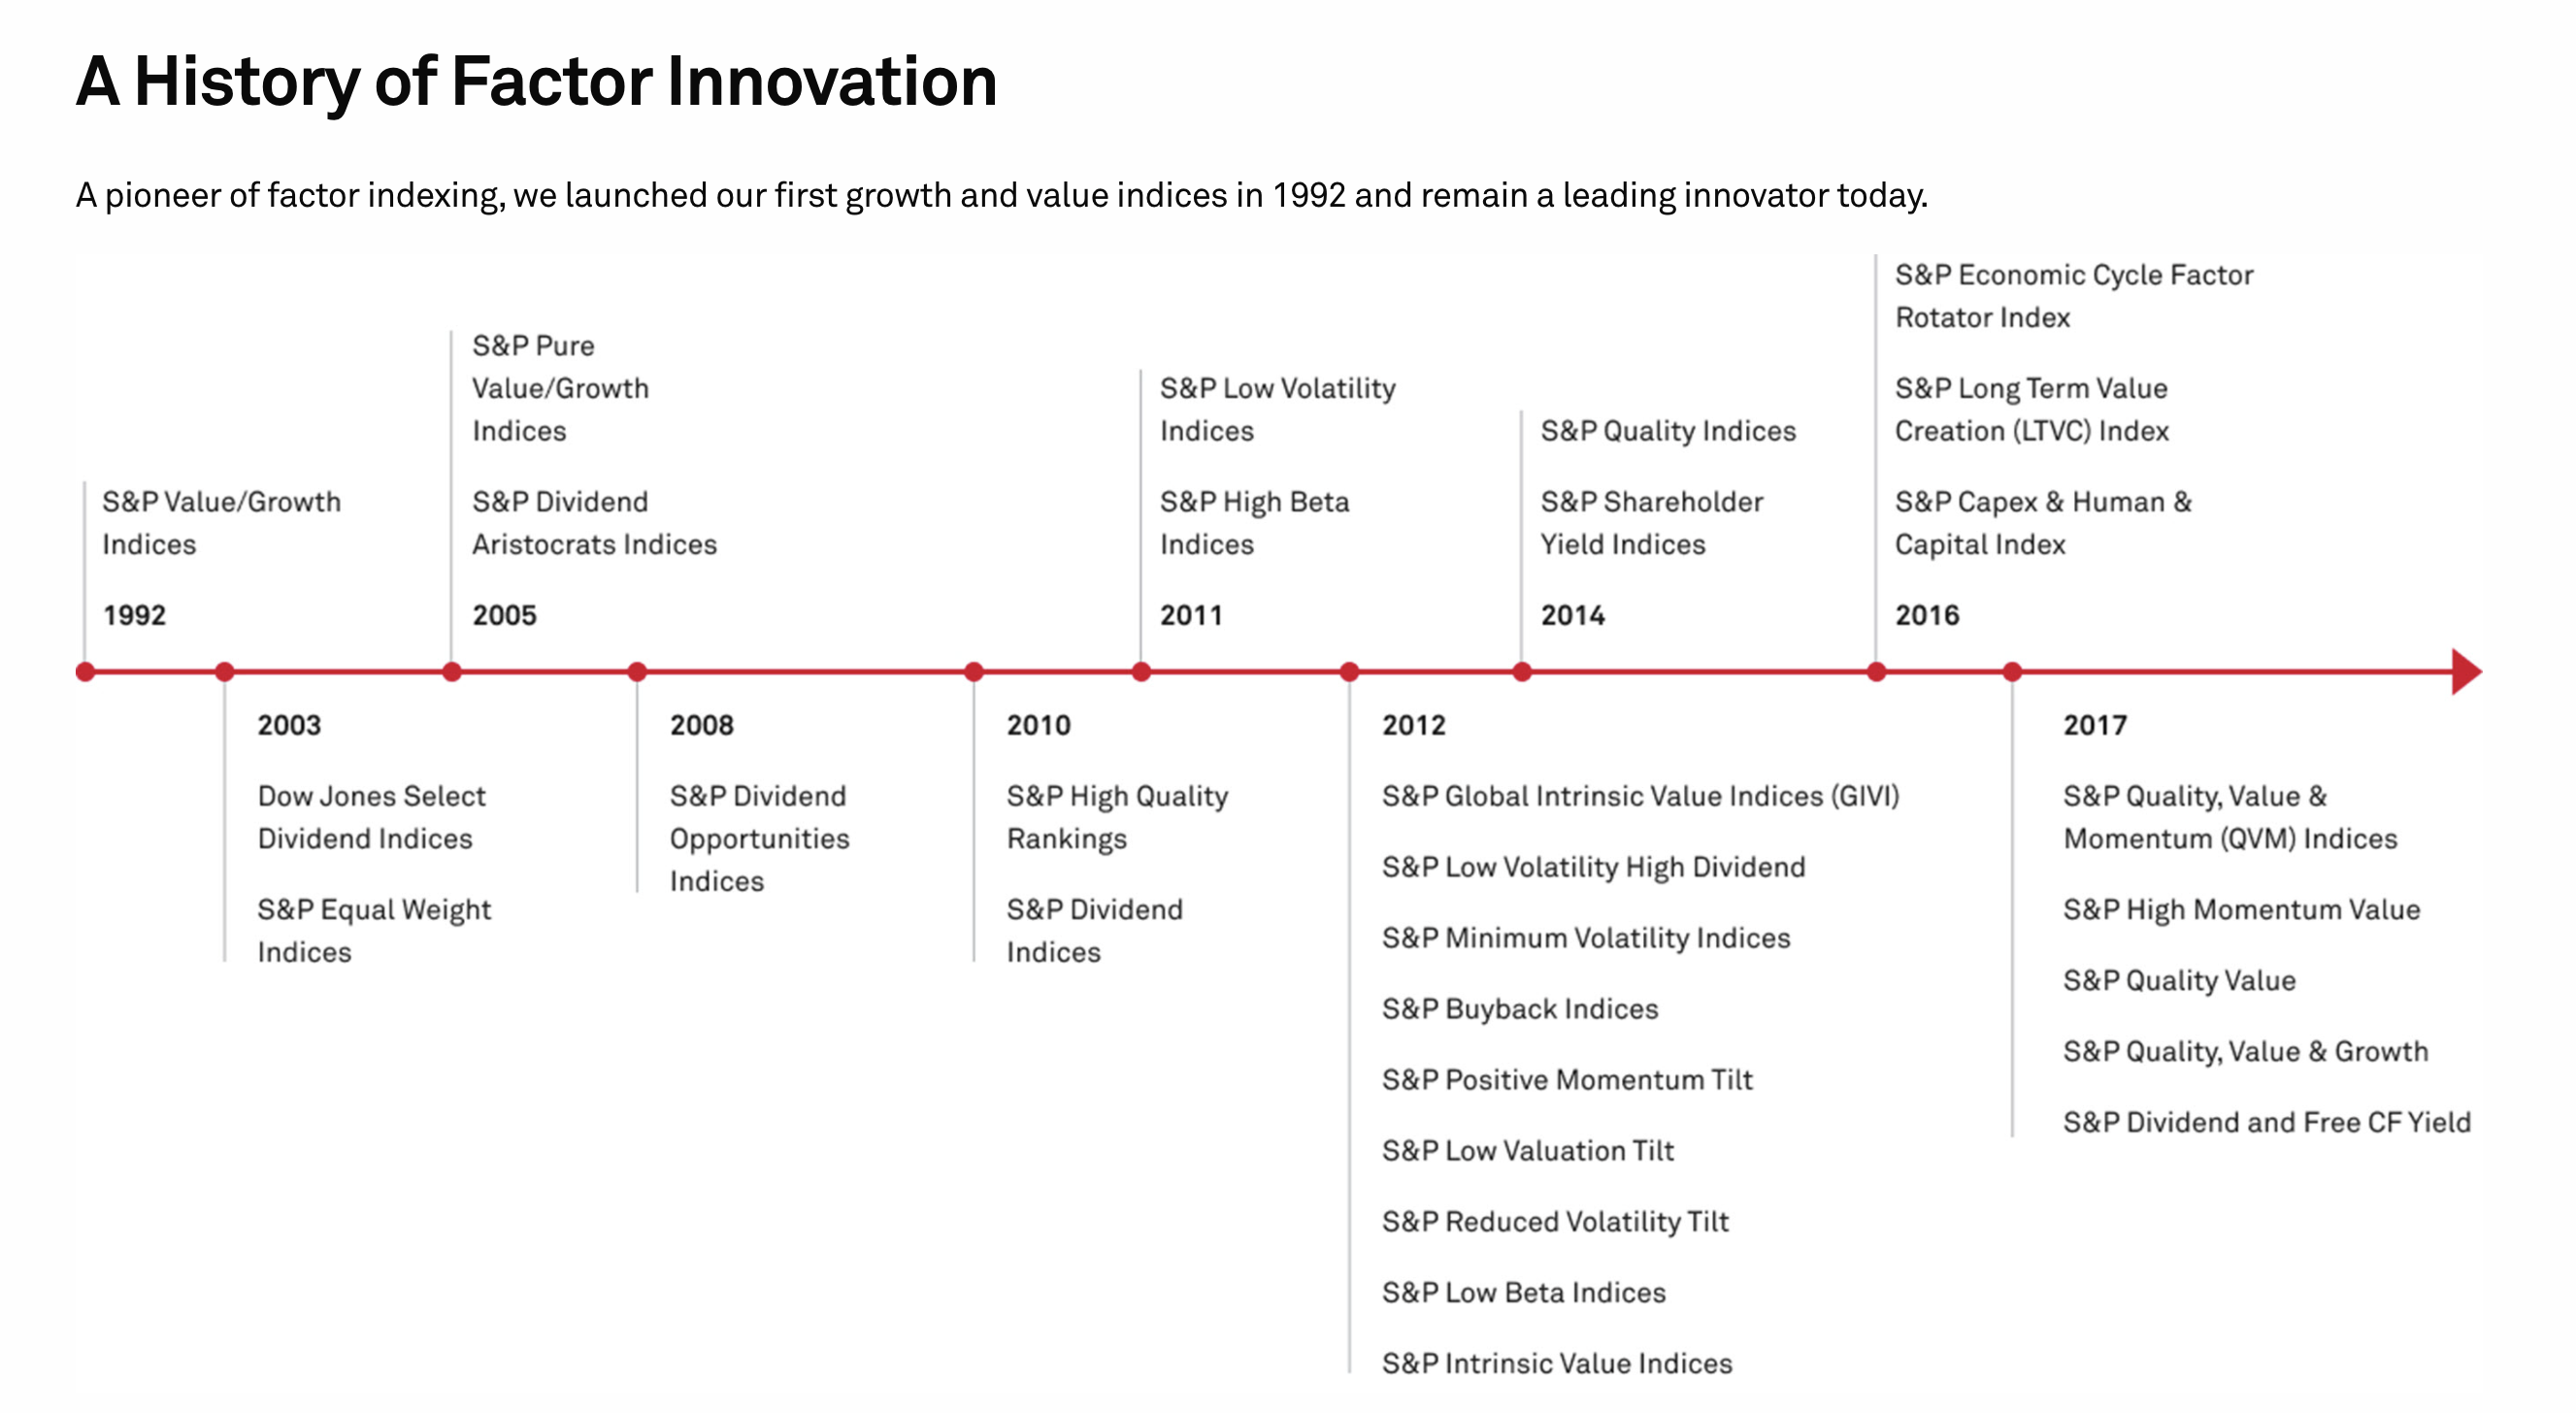

These indices are divided into 6 categories: Dividend Yield, Enhanced Value, Low Volatility, Momentum, Quality, and Size. Currently, there are 22 S&P Indices, and this project focuses on finding the most important indices to contribute to a portfolio. I then used the 10-year data to check the portfolio performance, and used S&P 500 Index as benchmark.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import math
import scipy.optimize as sco
import scipy.interpolate as spi

In [5]:
indices = pd.read_csv("pln.csv")
indices = indices.iloc[:,1:]
indices.head()

,...1,S&P MidCap 400 Dividend Aristocrats,S&P High Yield Dividend Aristocrats Index,S&P 500 High Dividend Index,S&P 500 Enhanced Value Index,S&P MidCap 400 Enhanced Value Index (USD),S&P SmallCap 600 Enhanced Value Index (USD),S&P 500,S&P 500 EQUAL WEIGHTED,S&P 400,...,S&P SmallCap 600 Equal Weighted Index,S&P MidCap 400 Low Volatility Index,S&P SmallCap 600 Low Volatility Index,S&P 500 Low Volatility Index,S&P 500 Quality (US Dollar),S&P SmallCap 600 Quality,S&P MidCap 400 Quality Index (USD),S&P 500 Momentum Index (US Dollar),S&P MidCap 400 Momentum Index (USD),S&P SmallCap 600 Momentum Index (USD)
0,2012-03-01,0.005705,0.001977,0.001647,0.012131,0.008054,0.003118,0.006139,0.006240,0.008030,...,0.004693,0.003114,0.000942,0.002523,0.005381,0.009346,0.011225,0.006434,0.012724,0.011237
1,2012-03-02,-0.008382,-0.003242,-0.001813,-0.004301,-0.010384,-0.019057,-0.003251,-0.005144,-0.008347,...,-0.019072,-0.006260,-0.012872,-0.000313,-0.002824,-0.017335,-0.009843,-0.002813,-0.007143,-0.014715
2,2012-03-05,0.001504,0.002123,0.000037,-0.006848,-0.003504,-0.003485,-0.003877,-0.005970,-0.003702,...,0.001429,0.005154,0.007516,0.002626,-0.003231,0.000807,-0.003239,-0.002844,-0.006735,-0.000846
3,2012-03-06,-0.015567,-0.013940,-0.011357,-0.024317,-0.026719,-0.022625,-0.015490,-0.018294,-0.019271,...,-0.020077,-0.011011,-0.012854,-0.007738,-0.013045,-0.019313,-0.018370,-0.013985,-0.019551,-0.021020
4,2012-03-07,0.007459,0.003937,0.001940,0.011369,0.012320,0.010372,0.006877,0.008160,0.009547,...,0.011324,0.005207,0.006967,0.002645,0.006798,0.008449,0.009796,0.006519,0.008671,0.009438


After loading the data, I selected 3 indices from each category into my portfolio, and gave them equal weights. After that, I calculated the portfolio daily return and compared it with the S&P 500 Index return. I set a variable "better" for the result. If the portfolio is better, better = 1; if not, better = 0. I then calculate the difference between the returns of each indice and S&P 500. The new table includes the margin of each indice and the daily performance of the portfolio.

In [56]:
columns = ['S&P 600', 'S&P 400','S&P 500','...1']
sp500 = indices[["S&P 500"]]
table = indices.drop(columns = columns)
# table['Effective date'] = pd.to_datetime(table['Effective date'])
# table.set_index('Effective date', inplace=True)

table['mean'] = table.mean(axis=1)
table["sp500"] = sp500
table['better'] = np.where(table['sp500']< table['mean'],0,1)
cols = table.columns.tolist()
for i in cols:
  if i not in ['mean','sp500','better']:
    table[i] = table[i] - table['sp500']
table = table.drop(columns = ['mean','sp500'])
#table.iloc[:,:-1].cumsum().plot(figsize = (10,6), cmap='coolwarm',legend = False)
table.head()


,S&P MidCap 400 Dividend Aristocrats,S&P High Yield Dividend Aristocrats Index,S&P 500 High Dividend Index,S&P 500 Enhanced Value Index,S&P MidCap 400 Enhanced Value Index (USD),S&P SmallCap 600 Enhanced Value Index (USD),S&P 500 EQUAL WEIGHTED,S&P MidCap 400 Equal Weighted Index,S&P SmallCap 600 Equal Weighted Index,S&P MidCap 400 Low Volatility Index,S&P SmallCap 600 Low Volatility Index,S&P 500 Low Volatility Index,S&P 500 Quality (US Dollar),S&P SmallCap 600 Quality,S&P MidCap 400 Quality Index (USD),S&P 500 Momentum Index (US Dollar),S&P MidCap 400 Momentum Index (USD),S&P SmallCap 600 Momentum Index (USD),better
0,-0.000434,-0.004162,-0.004493,0.005992,0.001915,-0.003021,0.000100,0.000799,-0.001446,-0.003026,-0.005197,-0.003616,-0.000759,0.003207,0.005085,0.000294,0.006585,0.005098,0
1,-0.005131,0.000009,0.001438,-0.001050,-0.007132,-0.015806,-0.001893,-0.006771,-0.015821,-0.003009,-0.009621,0.002938,0.000427,-0.014084,-0.006591,0.000439,-0.003892,-0.011464,1
2,0.005381,0.006000,0.003915,-0.002971,0.000373,0.000392,-0.002092,0.000215,0.005306,0.009031,0.011393,0.006504,0.000646,0.004684,0.000638,0.001033,-0.002857,0.003031,0
3,-0.000078,0.001549,0.004132,-0.008828,-0.011229,-0.007136,-0.002805,-0.004201,-0.004588,0.004479,0.002635,0.007752,0.002445,-0.003824,-0.002881,0.001505,-0.004062,-0.005530,1
4,0.000582,-0.002940,-0.004937,0.004493,0.005443,0.003495,0.001283,0.002832,0.004447,-0.001669,0.000091,-0.004232,-0.000079,0.001572,0.002919,-0.000358,0.001794,0.002561,0


After cleaning and manipulating the data, I used XGBoost model to train the data. Before the process, I assigned the data into training and testing groups, and standardized the margin.

In [7]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import roc_curve, auc,mean_squared_error,confusion_matrix
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance

In [8]:
X,y = table.iloc[:,:-1], table['better']
feature_names = X.columns.tolist()
X = StandardScaler().fit_transform(X)
data_dmatrix = xgb.DMatrix(data=X,label=y,feature_names=feature_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [9]:
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
scores = cross_val_score(xgbc, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

y_pred = xgbc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

Mean cross-validation score: 0.95
K-fold CV average score: 0.95
[[246   7]
 [ 17 236]]


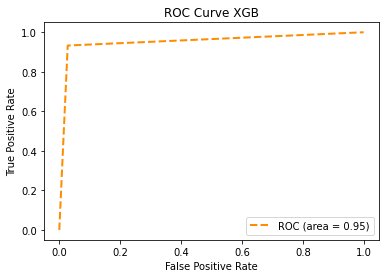

In [10]:
### Calculate and plot AUC
fpr, tpr, thersholds = roc_curve(y_test, y_pred)
 
 
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'k--', color='darkorange',label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
 
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve XGB')
plt.legend(loc="lower right")
plt.show()


The model has a 95% accuracy and 0.96 AUC. Now it is time to look at the importances of different indices.

In [11]:
xgbc.feature_importances_

array([0.08998572, 0.028259  , 0.02118162, 0.01014803, 0.01505156,
       0.03223012, 0.04212728, 0.3910197 , 0.05256744, 0.02638537,
       0.12111203, 0.0079297 , 0.00319813, 0.07962465, 0.01630828,
       0.01521637, 0.01751993, 0.03013509], dtype=float32)

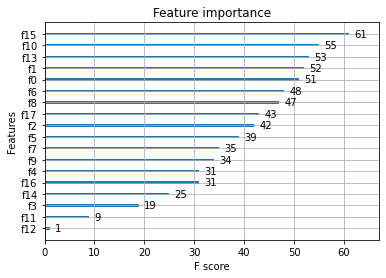

In [12]:
plot_importance(xgbc)

Based on the visualization, the top 7 indices are more important in determining the performance of the portfolio. Therefore, I decided to take them out as a new portfolio and repeat the process to test the result.

In [13]:
importantIndices = table.iloc[:,[0,1,5,6,8,10,15]].columns.tolist()
importantIndices

['S&P MidCap 400 Dividend Aristocrats',
 'S&P High Yield Dividend Aristocrats Index',
 'S&P SmallCap 600 Enhanced Value Index (USD)',
 'S&P 500 EQUAL WEIGHTED',
 'S&P SmallCap 600 Equal Weighted Index',
 'S&P SmallCap 600 Low Volatility Index',
 'S&P 500 Momentum Index (US Dollar)']

In [14]:
newTable = indices.drop(columns = columns)[importantIndices]
newTable['mean'] = newTable.mean(axis=1)
newTable["sp500"] = sp500
newTable['better'] = np.where(newTable['sp500']< newTable['mean'],0,1)
cols = newTable.columns.tolist()
for i in cols:
  if i not in ['mean','sp500','better']:
    newTable[i] = newTable[i] - newTable['sp500']
newTable = newTable.drop(columns = ['mean','sp500'])
newTable.head()

,S&P MidCap 400 Dividend Aristocrats,S&P High Yield Dividend Aristocrats Index,S&P SmallCap 600 Enhanced Value Index (USD),S&P 500 EQUAL WEIGHTED,S&P SmallCap 600 Equal Weighted Index,S&P SmallCap 600 Low Volatility Index,S&P 500 Momentum Index (US Dollar),better
0,-0.000434,-0.004162,-0.003021,0.000100,-0.001446,-0.005197,0.000294,1
1,-0.005131,0.000009,-0.015806,-0.001893,-0.015821,-0.009621,0.000439,1
2,0.005381,0.006000,0.000392,-0.002092,0.005306,0.011393,0.001033,0
3,-0.000078,0.001549,-0.007136,-0.002805,-0.004588,0.002635,0.001505,1
4,0.000582,-0.002940,0.003495,0.001283,0.004447,0.000091,-0.000358,0


In [15]:
X,y = newTable.iloc[:,:-1], newTable['better']
X = StandardScaler().fit_transform(X)
# feature_names = X.columns.tolist()
data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [16]:
xgbc2 = XGBClassifier()
xgbc2.fit(X_train, y_train)
scores = cross_val_score(xgbc2, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc2, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

y_pred = xgbc2.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

Mean cross-validation score: 0.96
K-fold CV average score: 0.96
[[235  15]
 [  8 248]]


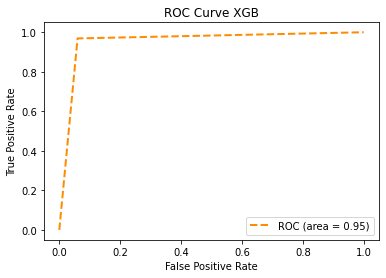

In [17]:
### Calculate and plot AUC
fpr, tpr, thersholds = roc_curve(y_test, y_pred)
 
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'k--', color='darkorange',label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
 
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve XGB')
plt.legend(loc="lower right")
plt.show()


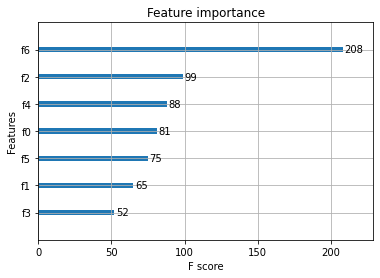

In [18]:
plot_importance(xgbc2)

I then use Principal Components Analysis to plot the importance of variables.

In [19]:
newPort = newTable.iloc[:,:-1]

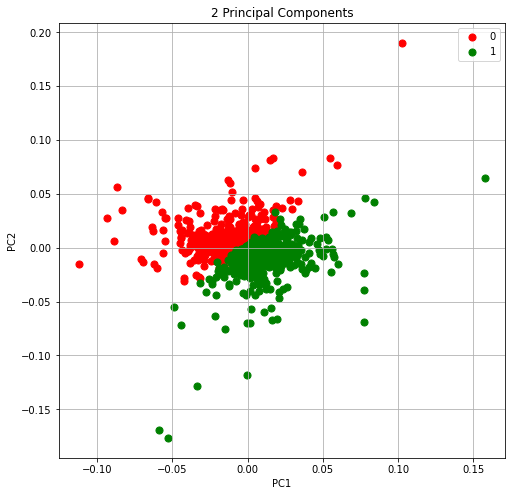

In [20]:
pca2 = PCA(n_components=7)
newX = pca2.fit_transform(newPort)  ### the new data
invX = pca2.inverse_transform(newPort)

pcaDf = pd.DataFrame(data = newX, columns = list(range(7)))
finalDF = pd.concat([pcaDf, newTable[['better']]],axis = 1)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("PC1")
ax.set_ylabel('PC2')
ax.set_title('2 Principal Components')

targets = [0,1]
colors = ['r','g']
for target, color in zip(targets, colors):
    indicesToKeep = finalDF['better'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 0]
               , finalDF.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

The final result shows that when the PC1s are high, the portfolio is outperforming the S&P 500 index, with an accuracy of 96%.


These are the final components of the portfolio: 'S&P MidCap 400 Dividend Aristocrats',
 'S&P High Yield Dividend Aristocrats Index',
 'S&P SmallCap 600 Enhanced Value Index (USD)',
 'S&P 500 EQUAL WEIGHTED',
 'S&P SmallCap 600 Equal Weighted Index',
 'S&P SmallCap 600 Low Volatility Index',
 'S&P 500 Momentum Index (US Dollar)'.


After the analysis, I tried to come up with an optimial portfolio with these 7 stocks. Before that, I visualized the stock growths and calculated the returns, variances, and covariances between the stocks.

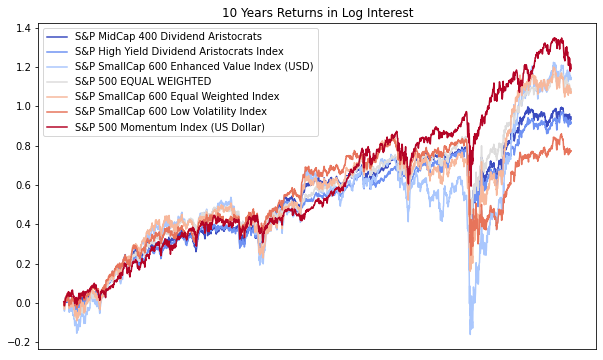

In [55]:
port = indices[importantIndices]
port.cumsum().plot(figsize = (10,6), cmap='coolwarm',title = "10 Years Returns in Log Interest").get_xaxis().set_visible(False)

In [42]:
print("Returns: \n", port.mean()* 252) 
print("Variances: \n",port.var() * 252)

Returns: 
 S&P MidCap 400 Dividend Aristocrats            0.094342
S&P High Yield Dividend Aristocrats Index      0.091765
S&P SmallCap 600 Enhanced Value Index (USD)    0.114290
S&P 500 EQUAL WEIGHTED                         0.108528
S&P SmallCap 600 Equal Weighted Index          0.107159
S&P SmallCap 600 Low Volatility Index          0.077149
S&P 500 Momentum Index (US Dollar)             0.118828
dtype: float64
Variances: 
 S&P MidCap 400 Dividend Aristocrats            0.029762
S&P High Yield Dividend Aristocrats Index      0.026890
S&P SmallCap 600 Enhanced Value Index (USD)    0.065771
S&P 500 EQUAL WEIGHTED                         0.030873
S&P SmallCap 600 Equal Weighted Index          0.051375
S&P SmallCap 600 Low Volatility Index          0.035919
S&P 500 Momentum Index (US Dollar)             0.032913
dtype: float64


In [24]:
port.cov() * 252

,S&P MidCap 400 Dividend Aristocrats,S&P High Yield Dividend Aristocrats Index,S&P SmallCap 600 Enhanced Value Index (USD),S&P 500 EQUAL WEIGHTED,S&P SmallCap 600 Equal Weighted Index,S&P SmallCap 600 Low Volatility Index,S&P 500 Momentum Index (US Dollar)
S&P MidCap 400 Dividend Aristocrats,0.029762,0.027350,0.037510,0.028320,0.035326,0.030349,0.004769
S&P High Yield Dividend Aristocrats Index,0.027350,0.026890,0.034421,0.027585,0.032446,0.028060,0.004890
S&P SmallCap 600 Enhanced Value Index (USD),0.037510,0.034421,0.065771,0.037854,0.055637,0.041850,0.006968
S&P 500 EQUAL WEIGHTED,0.028320,0.027585,0.037854,0.030873,0.035840,0.029318,0.006853
S&P SmallCap 600 Equal Weighted Index,0.035326,0.032446,0.055637,0.035840,0.051375,0.039858,0.006281
S&P SmallCap 600 Low Volatility Index,0.030349,0.028060,0.041850,0.029318,0.039858,0.035919,0.004382
S&P 500 Momentum Index (US Dollar),0.004769,0.004890,0.006968,0.006853,0.006281,0.004382,0.032913


Assign weights to stocks and calculate the portfolio return and standard deviation.

In [25]:
nums = len(importantIndices)
weights = np.random.random(nums)
weights /= np.sum(weights)
preturns = np.sum((weights * port.mean()) * 252)
pstd = math.sqrt(np.dot(weights.T, np.dot(port.cov() * 252, weights)))  
preturns, pstd

0.9999999999999999

Run 100,000 times Monte Carlo and graph the expected return vs expected volatility plot.

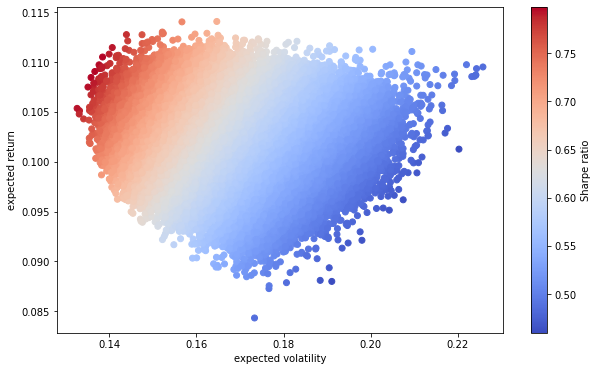

In [44]:
def gen_prets(weights):
    return np.sum((weights * port.mean()) * 252)
def gen_pstd(weights):
    return math.sqrt(np.dot(weights.T, np.dot(port.cov() * 252, weights)))

r = 0.04
prets = []
pstd = []
for i in range(100000):
    weights = np.random.random(nums)
    weights /= np.sum(weights)
    prets.append(gen_prets(weights))
    pstd.append(gen_pstd(weights))

prets = np.array(prets)
pstd = np.array(pstd)

plt.figure(figsize = (10 , 6))
plt.scatter(pstd , prets , c = (prets) / pstd,
            marker = 'o', cmap = 'coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe ratio')

I then found the portfolio with the largest sharpe ratio and calculated the portfolio return, standard deviation, and sharpe ratio.

In [28]:
def mini_sharpe(weights):
    return - gen_prets(weights) / gen_pstd(weights)

cons = ({'type': 'eq','fun': lambda x: np.sum(x) - 1})  #sum of weight = 0
bnds = tuple((0, 1) for x in range(nums)) #0 <= wi <= 1
eweights = np.array(nums * [1. / nums,]) 
opts = sco.minimize(mini_sharpe, eweights, method='SLSQP', bounds=bnds, constraints=cons)  #maximize sharpe
opts

     fun: -0.8169577986528557
     jac: array([ 0.00353591,  0.00967354,  0.10238981, -0.00102665,  0.097611  ,
        0.13886883,  0.00096432])
 message: 'Optimization terminated successfully.'
    nfev: 64
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.18001775e-17, 3.02132389e-19, 0.00000000e+00, 4.85251028e-01,
       6.72759399e-19, 1.36282741e-17, 5.14748972e-01])

In [49]:
sp500 = indices[["S&P 500"]]
sp500return = float(sp500.mean()*252)
sp500std = float((sp500.var() * 252)**0.5)
sp500sharpe = float(sp500.mean()*252 / (sp500.var() * 252)**0.5)
print("Optimal Portfolio Stats: \n", gen_prets(opts['x']),gen_pstd(opts['x']),gen_prets(opts['x']) / gen_pstd(opts['x']))
print("S&P500 Stats: \n", sp500return, sp500std, sp500sharpe)


Optimal Portfolio Stats: 
 0.11383006477538284 0.13933408183762486 0.8169577986528557
S&P500 Stats: 
 0.11350387538179223 0.16637330139702558 0.68222409742854


Comparing with the S&P 500 index, the portfolio has a lower standard deviation (0.027) and a higher sharpe ratio (0.134), which indicates that with the same annual return, investing in the portfolio will have a lower risk.

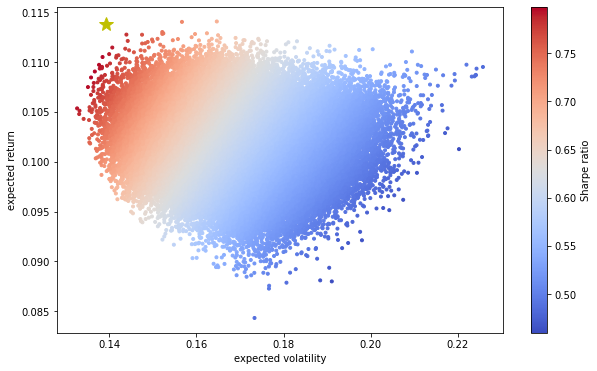

In [50]:
plt.figure(figsize = (10 , 6))
plt.scatter(pstd , prets , c = (prets) / pstd,
            marker = '.', cmap = 'coolwarm')
# plt.plot(fstd , frets , 'b')
plt.plot(gen_pstd(opts['x']), gen_prets(opts['x']),   ### the yellow star indicates the optimal portfolio
         'y*', markersize=15.0)    

plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe ratio')